<a href="https://colab.research.google.com/github/thedatasense/rl_for_theranostics/blob/master/Basic_PBPK_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Understanding Peptides: The Basics

## What is a Peptide?

A **peptide** is a short chain of amino acids connected by peptide bonds. Amino acids are the fundamental building blocks of proteins, and they contain both an amino group \(- \text{NH}_2\) and a carboxyl group \(- \text{COOH}\). A peptide bond forms when the carboxyl group of one amino acid reacts with the amino group of another, resulting in a dehydration synthesis reaction that releases a water molecule \( \text{H}_2\text{O} \) and forms a peptide bond \( -\text{CO-NH}- \).

```python
# Example of peptide bond formation between two amino acids
# Amino Acid 1 (AA1) + Amino Acid 2 (AA2) -> Dipeptide (AA1-AA2) + Water (H2O)
```

## Types of Peptides

- **Dipeptide**: Comprises two amino acids.
- **Tripeptide**: Comprises three amino acids.
- **Oligopeptide**: Comprises fewer than 20 amino acids.
- **Polypeptide**: Comprises more than 20 amino acids but is smaller than a protein.
- **Protein**: Consists of one or more long chains of amino acids and often contains multiple polypeptide subunits.

## Importance in Biology

Peptides play various roles in biological systems:

1. **Hormones**: Some peptides act as hormones, e.g., insulin, which regulates blood sugar levels.
2. **Neurotransmitters**: Some function as neurotransmitters, like endorphins, which act as natural painkillers.
3. **Antibodies**: These are immune system proteins composed of peptides.
4. **Enzymes**: Most enzymes are proteins that catalyze biochemical reactions and consist of peptide chains.
5. **Structural Components**: Collagen, a major component of skin and bone, is also a form of peptide.

## Radiolabeled Peptides in Cancer Therapy

In the context of cancer research and medical imaging, peptides can be engineered to target specific cells or receptors. These peptides can be labeled with a radioactive isotope for imaging and treatment purposes.

---

In the context of radiolabeled peptides for cancer therapy or imaging, a peptide can  act as a "carrier" for the radioactive material. The peptide is chemically modified to include a radioactive isotope, like Lutetium-177 (\(^{177}\text{Lu}\)) in the case of PSMA-specific peptides for prostate cancer treatment. The peptide is designed to bind specifically to a target—often a receptor that is overexpressed on cancer cells. When the peptide binds to the target, it delivers its radioactive payload to the cancer cells.

### How Does it Work as a Carrier?

1. **Specificity**: The peptide is chosen or designed to have a high affinity for a particular receptor or protein that is overexpressed on cancer cells. This ensures that the peptide—and therefore the radioactive isotope—will find its way to the cancer cells.

2. **Binding**: Once the peptide finds its target, it binds to the receptor. This is the "delivery" phase where the radioactive isotope is effectively brought into close proximity with the cancer cells.

3. **Internalization**: In many cases, the receptor-peptide complex is internalized by the cell, allowing the radioactive isotope to enter the cancer cell. This makes the therapy even more effective, as the radiation can act directly within the cell.

4. **Radiation Effect**: The radioactive isotope emits radiation that damages the cancer cell, either killing it or inhibiting its ability to grow and divide.

5. **Minimal Damage to Healthy Cells**: Because the peptide is designed to target a receptor mainly found on cancer cells, healthy cells that do not express this receptor are less likely to be affected, minimizing side effects.

So, in summary, the peptide serves as a carrier that delivers the radioactive isotope specifically to cancer cells, enabling targeted therapy or imaging.

### So what's the problem?

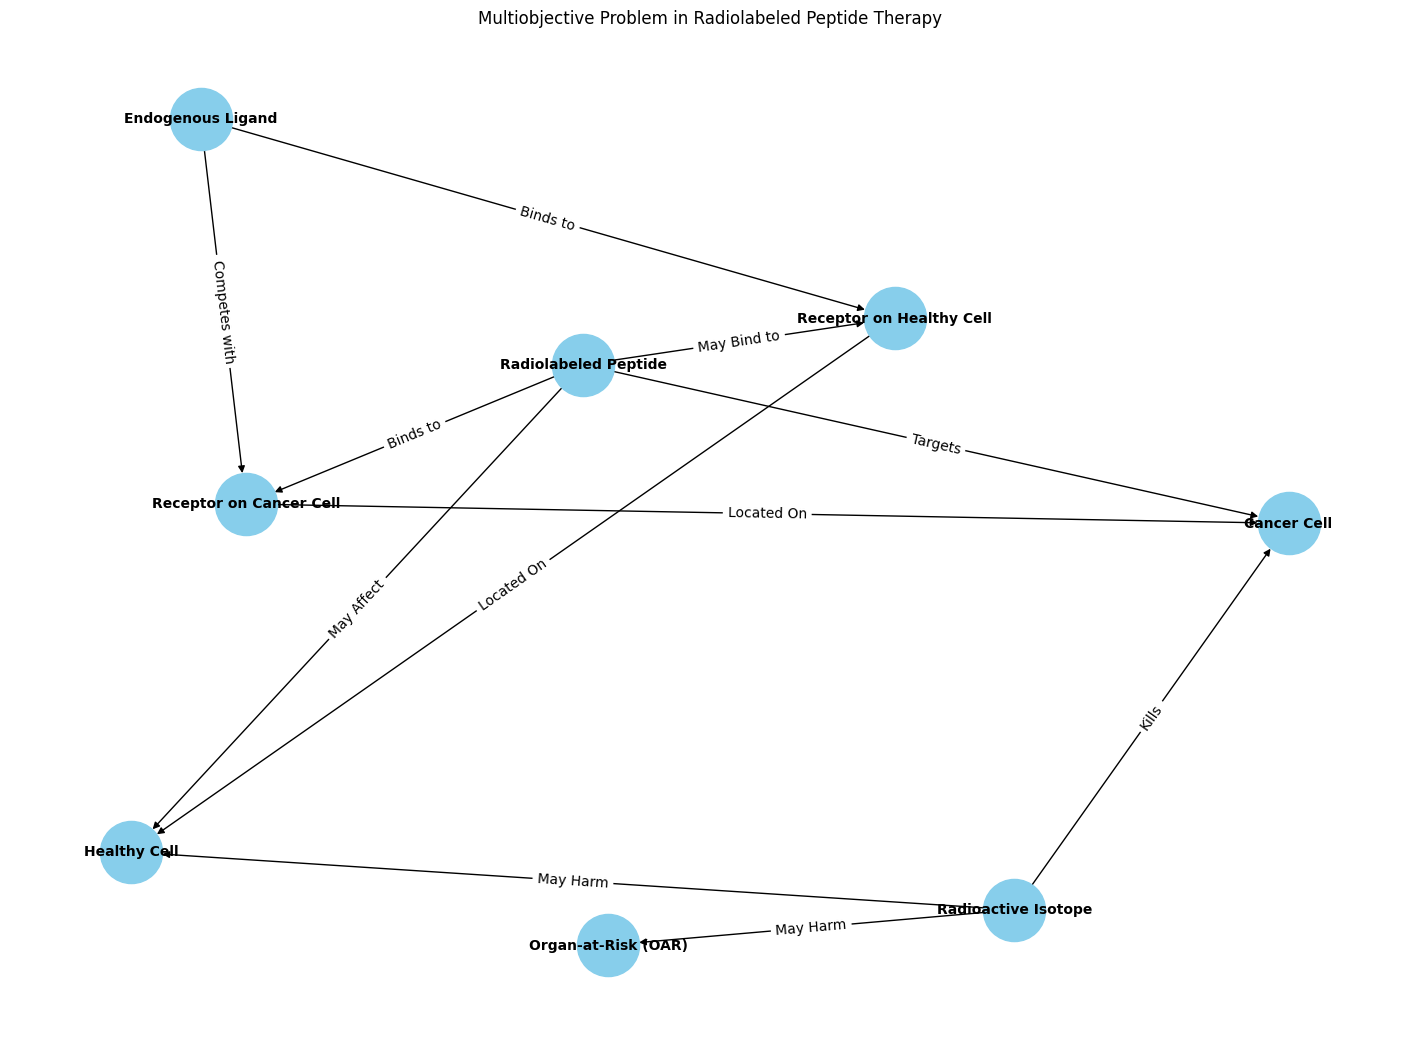

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their descriptions
nodes = {
    'Radiolabeled Peptide': 'Carrier for Radioactive Isotope',
    'Cancer Cell': 'Target for Treatment',
    'Healthy Cell': 'Non-target Cell',
    'Receptor on Cancer Cell': 'Binding Site for Peptide',
    'Receptor on Healthy Cell': 'Potential Off-Target Binding Site',
    'Endogenous Ligand': 'Natural Ligand for Receptor',
    'Radioactive Isotope': 'Emits Radiation to Kill Cell',
    'Organ-at-Risk (OAR)': 'Sensitive to Radiation'
}

G.add_nodes_from(nodes.keys())

# Add edges to represent relationships or actions
edges = [
    ('Radiolabeled Peptide', 'Cancer Cell', 'Targets'),
    ('Radiolabeled Peptide', 'Healthy Cell', 'May Affect'),
    ('Radiolabeled Peptide', 'Receptor on Cancer Cell', 'Binds to'),
    ('Radiolabeled Peptide', 'Receptor on Healthy Cell', 'May Bind to'),
    ('Receptor on Cancer Cell', 'Cancer Cell', 'Located On'),
    ('Receptor on Healthy Cell', 'Healthy Cell', 'Located On'),
    ('Endogenous Ligand', 'Receptor on Cancer Cell', 'Competes with'),
    ('Endogenous Ligand', 'Receptor on Healthy Cell', 'Binds to'),
    ('Radioactive Isotope', 'Cancer Cell', 'Kills'),
    ('Radioactive Isotope', 'Healthy Cell', 'May Harm'),
    ('Radioactive Isotope', 'Organ-at-Risk (OAR)', 'May Harm')
]

G.add_edges_from([(u, v, {'label': l}) for u, v, l in edges])

# Create plot
# Adjust the layout and redraw the graph to avoid overlapping nodes
pos = nx.spring_layout(G, seed=42, k=2)  # Increase the 'k' parameter to push nodes farther apart

# Create the plot with the adjusted layout
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color='skyblue', font_size=10, font_weight='bold', node_size=2000, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Multiobjective Problem in Radiolabeled Peptide Therapy')
plt.show()



The diagram above illustrates the multiobjective problem faced in radiolabeled peptide therapy:

### Nodes:

1. **Radiolabeled Peptide**: Acts as the carrier for the radioactive isotope. It's engineered to target specific receptors on cancer cells.
2. **Cancer Cell**: The primary target for treatment. It has receptors to which the radiolabeled peptide binds.
3. **Healthy Cell**: These are the cells that we don't want to harm. They may also have receptors similar to the target ones.
4. **Receptor on Cancer Cell**: The binding site for the radiolabeled peptide on the cancer cell.
5. **Receptor on Healthy Cell**: Potential off-target binding sites for the radiolabeled peptide.
6. **Endogenous Ligand**: The natural ligand that might compete with the peptide for binding to the receptor.
7. **Radioactive Isotope**: The component that emits radiation designed to kill or impair the cancer cell.
8. **Organ-at-Risk (OAR)**: Organs like the kidneys or salivary glands that are sensitive to radiation and could be affected by the treatment.

### Edges (Interactions):

- The radiolabeled peptide targets cancer cells and may also affect healthy cells.
- The peptide binds to receptors on both cancer and healthy cells.
- Endogenous ligands can compete with the peptide for receptor binding.
- The radioactive isotope kills or harms the cancer cell and may also harm healthy cells and OARs.

This multiobjective problem requires optimizing the treatment to maximize cancer cell death while minimizing the impact on healthy cells and OARs. It's a complex challenge involving biological specificity, pharmacokinetics, and radiation safety.